<a href="https://colab.research.google.com/github/AndrewCrossman/Graduate_Research/blob/main/Chi_Squared_Residuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import requests
import numpy as np
import requests
import io
from astropy.coordinates import cartesian_to_spherical
import pandas as pd
import scipy as sp
from sklearn.neighbors import KDTree
from scipy import optimize
from google.colab import files
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
url1 = 'https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Tests/Coreshell5050_AuPd_onAu/RMC_Coreshell5050_AuPd_onAu_4-10-5_v1/rmc_suite.log'
url2 = 'https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Tests/Coreshell5050_AuPd_onAu/RMC_Coreshell5050_AuPd_onAu_4-10-5_v2/rmc_suite.log'
url3 = 'https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Tests/Coreshell5050_AuPd_onAu/RMC_Coreshell5050_AuPd_onAu_4-10-5_v3/rmc_suite.log'
url4 = 'https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Tests/Coreshell5050_AuPd_onAu/RMC_Coreshell5050_AuPd_onAu_4-10-5_v4/rmc_suite.log'
url5 = 'https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Tests/Coreshell5050_AuPd_onAu/RMC_Coreshell5050_AuPd_onAu_4-10-5_v5/rmc_suite.log'
PlotTitle = r'$Au_{50}/Pd_{50}$ 4-10-5'
savename = 'Au50Pd50_4-10-5_chi_squared_runs.png'
page1 = requests.get(url1)
page2 = requests.get(url2)
page3 = requests.get(url3)
page4 = requests.get(url4)
page5 = requests.get(url5)

In [ ]:
chi_squared1 = []
log_text1 = page1.text.split()
for i in range(len(log_text1)):
  if log_text1[i]=='s2x2:':
    chi_squared1.append(float(log_text1[i+1]))

chi_squared2 = []
log_text2 = page2.text.split()
for i in range(len(log_text2)):
  if log_text2[i]=='s2x2:':
    chi_squared2.append(float(log_text2[i+1]))

chi_squared3 = []
log_text3 = page3.text.split()
for i in range(len(log_text3)):
  if log_text3[i]=='s2x2:':
    chi_squared3.append(float(log_text3[i+1]))

chi_squared4 = []
log_text4 = page4.text.split()
for i in range(len(log_text4)):
  if log_text4[i]=='s2x2:':
    chi_squared4.append(float(log_text4[i+1]))

chi_squared5 = []
log_text5 = page5.text.split()
for i in range(len(log_text5)):
  if log_text5[i]=='s2x2:':
    chi_squared5.append(float(log_text5[i+1]))

In [ ]:
#page2.text

' rmc.shift.swap.mac\n Fm-3m             225\n Lattice constants :\n    a          b          c         alpha      beta       gamma      volume\n    4.07890    4.07890    4.07890   90.00000   90.00000   90.00000    67.8624    \n\n Metric Tensor     :\n      16.63743      0.00000      0.00000\n       0.00000     16.63743      0.00000\n       0.00000      0.00000     16.63743\n\n Reciprocal Lattice constants :\n    a*         b*         c*        alpha*     beta*      gamma*     volume\n    0.24516    0.24516    0.24516   90.00000   90.00000   90.00000   0.147357E-01\n\n Reciprocal metric tensor     : \n       0.06011     -0.00000     -0.00000\n      -0.00000      0.06011     -0.00000\n      -0.00000     -0.00000      0.06011\n\n Setting PDF calculation to no periodic bound., 3D, exact mode ..\n Read PDF data (r =   0.010 to  50.000 A, 49990 points) ...\n Setting up PDF segment ...\n Extending PDF search distance to  51.1429 A ...\n Current PDF calculation settings : \n   Maximum r [A]  

In [ ]:
print( len(chi_squared1) )
print( len(chi_squared2) )
print( len(chi_squared3) )
print( len(chi_squared4) )
print( len(chi_squared5) )

161
161
161
161
161


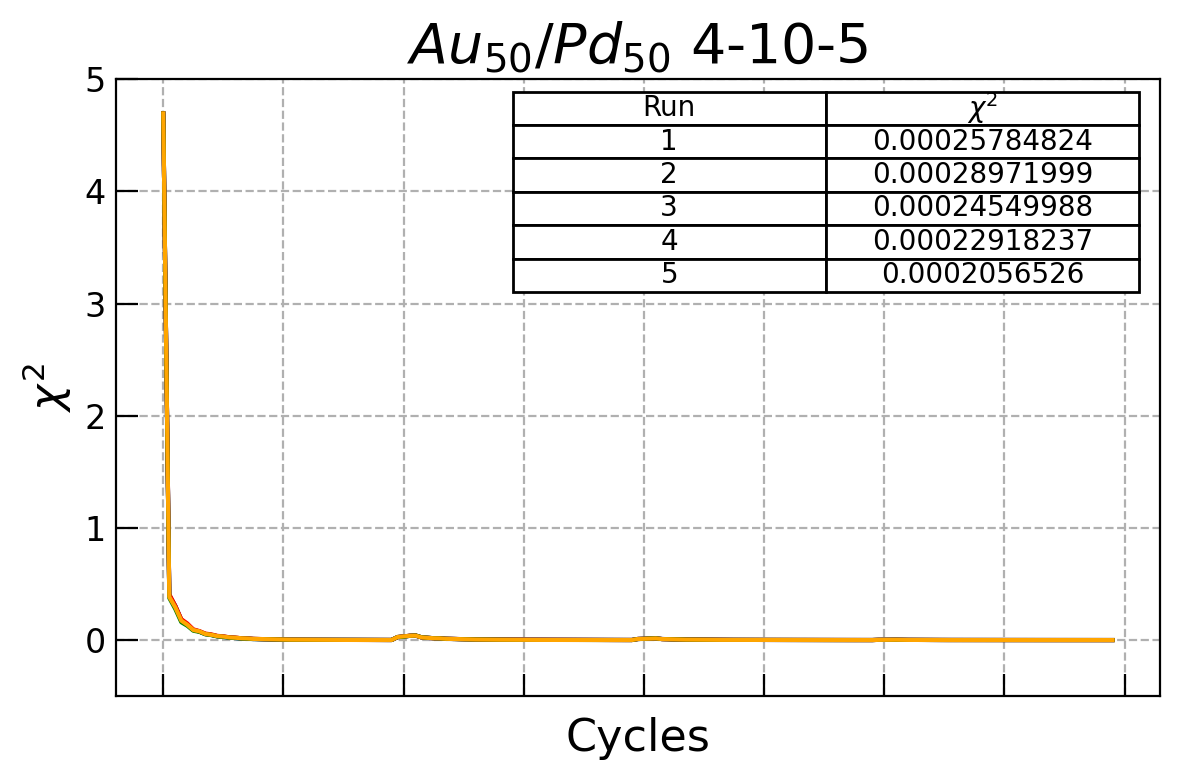

In [ ]:
################################################################################
# Plot Chi_Squared Data
################################################################################
fig1, ax1 = plt.subplots(figsize=(6,4),dpi=200)
ax1.plot(chi_squared1[2:], color='black')
ax1.plot(chi_squared2[2:], color='blue')
ax1.plot(chi_squared3[2:], color='red')
ax1.plot(chi_squared4[2:], color='green')
ax1.plot(chi_squared5[2:], color='orange')

################################################################################
# Plot settings
################################################################################
ax1.set_title(PlotTitle, fontsize=20)
ax1.set_ylabel(r'$\chi^2$', fontsize=16)
ax1.tick_params(axis='y', labelsize=12, direction='in', length=8)
ax1.set_xlabel(r'Cycles', fontsize=16)
ax1.tick_params(axis='x', labelsize=12, direction='in', length=8)
ax1.set_xticklabels([])
ax1.grid(True, linestyle='--')
ax1.set_axisbelow(True)
ax1.set_ylim(-.5,5)

col_labels=['Run',r'$\chi^2$']
table_vals=[[1, min(chi_squared1)],[2, min(chi_squared2)],[3, min(chi_squared3)],[4, min(chi_squared4)],[5, min(chi_squared5)]]
# the rectangle is where I want to place the table
the_table = plt.table(cellText=table_vals,
                  colWidths = [0.3]*3,
                  colLabels=col_labels,
                  loc='upper right',
                  colLoc = 'center',
                  cellLoc = 'center',
                  zorder=1)

plt.tight_layout()

In [ ]:
fig1.savefig(savename)
files.download(savename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>